# Exercise 2 - Data Preparation

You should have completed exercise 1 before this exercise.

We use the same dataset "train_FD001.txt" as in exercise 1. You can download it from moodle. 
In this exercise we focus on the data preparation. Data preparation typically is the most time-consuming task in machine learning and data mining tasks. It is fundamental to prepare the raw data to be processable by algorithms. Next to outlier removal and filtering and smoothing of the data, feature generation (e.g. Fourier Transformation) or feature reduction (e.g. Principal Component Analysis, PCA) can be applied. 

In this exercise, we will analyse the influence of basic filtering (moving average) and feature reduction methods (PCA) on the correlations of variables with the RUL.

First we load basic libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load your data, rename columns if you wish to.

In [4]:
# load data
train_path = "train_FD001.txt"

df = pd.read_csv(train_path, sep=" ", header=None)

df = df.drop(columns=[26,27])

data_header = {0: 'Engine', 1: 'Cycle', 2: 'Altitude', 3: 'MachNumber', 4: 'TRA', 5: 'T2', 6: 'T24', 7: 'T30', 8: 'T50', 9: 'P2', 10: 'P15', 11: 'P30', 12: 'Nf', 13: 'Nc', 14: 'epr', 15: 'Ps30', 16: 'phi', 17: 'NRf',
               18: 'NRc', 19: 'BPR', 20: 'farB', 21: 'htBleed', 22: 'Nf_dmd', 23: 'PCNfR_dmd', 24: 'W31', 25: 'W32'}

df = df.rename(columns=data_header)


df.head()

,Engine,Cycle,Altitude,MachNumber,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


### 2. Choose one of the variables with high RUL-correlation from exercise 1 and apply a moving average filter with window sizes of 5, 10 and 20 time steps.  Plot the results and compare it with the unfiltered signal.

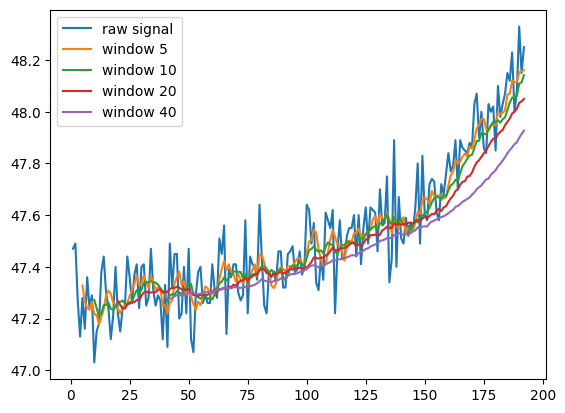

In [5]:
# Sensor Ps30 is taken as an example in this case. We plot the results for Engine No. 1
plt.plot(df[df.Engine == 1].Cycle, df[df.Engine == 1].Ps30, label='raw signal')
plt.plot(df[df.Engine == 1].Cycle, df[df.Engine == 1].Ps30.rolling(5).mean(), label='window 5')
plt.plot(df[df.Engine == 1].Cycle, df[df.Engine == 1].Ps30.rolling(10).mean(), label='window 10')
plt.plot(df[df.Engine == 1].Cycle, df[df.Engine == 1].Ps30.rolling(20).mean(), label='window 20')
plt.plot(df[df.Engine == 1].Cycle, df[df.Engine == 1].Ps30.rolling(40).mean(), label='window 40')
plt.legend()

The moving average can filter the noise in the signal of sensor Ps30 and smooths the data. However, when the window size is too large, the filter is unable to catch the dynamic of the signal. By consequence, window sizes greater than 10 do not seem to be appropriate for this sensor signal.

### 3. Compare correlations of the filtered sensor signal with the RUL and the raw signal with the RUL. What can you conclude from the results?

In [6]:
# First we have to construct our RUL:
rul = df.groupby('Engine')['Cycle'].max().reset_index()
rul.columns = ['Engine', 'max']
df = df.merge(rul, on=['Engine'], how='left')
df['RUL'] = df['max'] - df['Cycle']
df.drop('max', axis=1, inplace=True)

# we select a subset of the DataFrame for analysis purposes and calculate the moving averages for each engine:
df_select = df[['RUL', 'Engine', 'Cycle', 'Ps30']]
df_select.loc[:,'Ps30_w5'] = df_select.groupby('Engine').Ps30.rolling(5).mean().values
df_select.loc[:,'Ps30_w10'] = df_select.groupby('Engine').Ps30.rolling(10).mean().values
df_select.loc[:,'Ps30_w20'] = df_select.groupby('Engine').Ps30.rolling(20).mean().values
df_select.loc[:,'Ps30_w40'] = df_select.groupby('Engine').Ps30.rolling(40).mean().values

target_correlation = df_select.corr(method='pearson')

target_correlation

/tmp/ipykernel_7154/3916454791.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.loc[:,'Ps30_w5'] = df_select.groupby('Engine').Ps30.rolling(5).mean().values
/tmp/ipykernel_7154/3916454791.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.loc[:,'Ps30_w10'] = df_select.groupby('Engine').Ps30.rolling(10).mean().values
/tmp/ipykernel_7154/3916454791.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,RUL,Engine,Cycle,Ps30,Ps30_w5,Ps30_w10,Ps30_w20,Ps30_w40
RUL,1.000000,0.078753,-0.736241,-0.696228,-0.734678,-0.733645,-0.721598,-0.688183
Engine,0.078753,1.000000,0.078753,0.024707,0.027632,0.029675,0.033878,0.041896
Cycle,-0.736241,0.078753,1.000000,0.634385,0.668593,0.666014,0.651861,0.610296
Ps30,-0.696228,0.024707,0.634385,1.000000,0.940205,0.932037,0.924195,0.907097
Ps30_w5,-0.734678,0.027632,0.668593,0.940205,1.000000,0.991140,0.983976,0.968603
Ps30_w10,-0.733645,0.029675,0.666014,0.932037,0.991140,1.000000,0.994025,0.981215
Ps30_w20,-0.721598,0.033878,0.651861,0.924195,0.983976,0.994025,1.000000,0.992363
Ps30_w40,-0.688183,0.041896,0.610296,0.907097,0.968603,0.981215,0.992363,1.000000


In the correlation table, one can see that applying a moving average with small window sizes of 5, 10 or 20 helps to increase the correlation with the RUL by filtering the noise of the sensor signal. The best correlation can be found for the filter with window size 5.


### 4. Fit and apply a PCA on the sensor subset. Remember to standardize the data first. Plot the first two Principal Components against each other.
Hint: Libraries like Scikit Learn include suitable functions.  

In [7]:
from sklearn.decomposition import PCA

# List of sensors, the PCA should be applied only to the sensor signals, not to the whole data frame
sensors = ['T2','T24','T30','T50','P2', 'P15','P30', 'Nf', 'Nc','epr', 'Ps30','phi', 'NRf',
              'NRc','BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']

# Reduced list of sensors, without the sensors with a variance of 0
reduced_sensors = ['T24','T30','T50','P30', 'Nf', 'Nc', 'Ps30','phi', 'NRf',
              'NRc','BPR', 'htBleed',  'W31', 'W32']

from sklearn.preprocessing import StandardScaler
# scale the measured signals, so that they all have zero mean and standard deviation of one
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[reduced_sensors])

# perform a PCA on the standardized values
pca = PCA()
pca.fit(df_standardized)
pca_df = pd.DataFrame(pca.transform(df_standardized))
pca_df.columns = ['PC{}'.format(i) for i in pca_df.columns]

pca_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-2.959698,-0.436217,0.817832,0.630150,-0.348669,0.030201,0.638655,0.253831,0.232788,-0.154549,-0.388331,0.756105,-0.411900,0.351857
1,-2.374246,-0.781728,0.956063,0.286418,-0.026905,-0.305915,0.651329,0.061901,-0.221791,-0.106886,0.062605,-0.409432,-0.718900,0.163735
2,-2.994228,-0.533209,0.598888,-1.099285,-0.461665,0.229358,0.109858,-0.147933,0.274567,-0.036319,0.793524,0.044913,-0.029675,-0.071013
3,-3.400753,-0.824265,-0.408637,-0.052112,0.125555,-0.111402,-1.125321,0.330692,0.692364,0.735710,1.174569,-0.423292,0.223462,0.056456
4,-2.436515,-0.362540,-0.721222,0.360373,0.071054,-0.495779,0.224122,-0.166315,0.088582,-0.315159,0.503399,-0.130514,0.103438,-0.111764


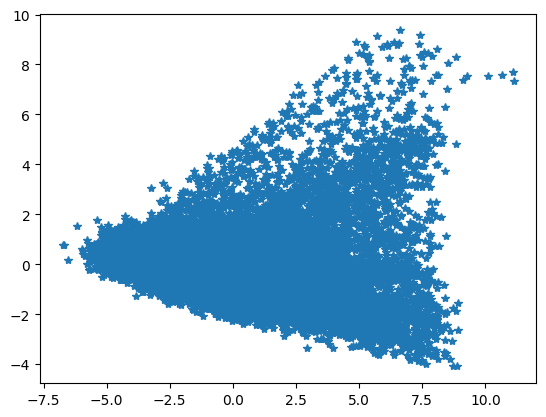

In [8]:
plt.plot(pca_df.PC0, pca_df.PC1, linestyle='', marker='*')

The principal component analysis performs a linear orthogonal transformation of the data space to maximise the variance along the first principal component. The results of the PCA depend heavily on the scale of the data. The sensor variables are all on a different scale with different variances and different units. Therefore, they should be standardized before applying the Principal Component Analysis. Otherwise, variables with a high variance would be of higher importance for the PCA.

In this case, we applied the PCA to a reduced set of sensors, already having eliminated the features with no variance (see Exercise Data Understanding). It would also be possible to include the full list of sensors. The PCA should then find a similar result. They have only been excluded for simplicity reasons.

The plot above shows the first two principal components. However, it is difficult to interpret without further information.

### 5. How much variance is explained by the first principal component?

<BarContainer object of 14 artists>

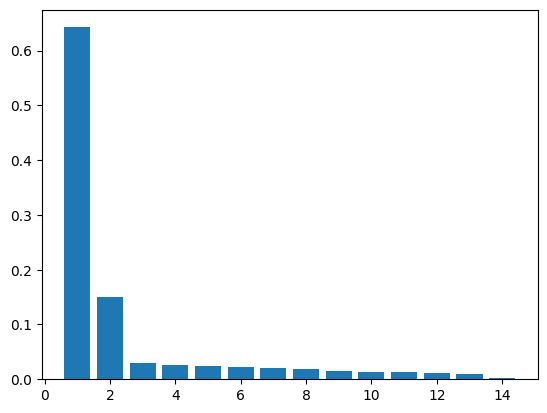

In [9]:
# bar plot of the explained variance ratios
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [10]:
# explained variance of the first principal component
print(pca.explained_variance_ratio_[0])

0.6425056071032743


The first principal component already explains more than 60% of the total variance in the dataset.

### 6. How many principal components are needed to explain more than 95% of the variance in the data?

In [11]:
pca.explained_variance_ratio_.cumsum()

array([0.64250561, 0.79221535, 0.82179368, 0.84809979, 0.87298356,
       0.89484951, 0.91555367, 0.93379721, 0.94852514, 0.96252661,
       0.97514024, 0.98746615, 0.99790901, 1.        ])

---> 10 components are needed to explain more than 95% of the variance in the data.

### 7. Analyse the correlation of the principle components with the RUL. Does the result meet your expectations?

In [12]:
pca_ddf = pd.concat([df_select, pca_df.iloc[:,0:10]], axis=1)

In [13]:
pca_ddf.corr()

,RUL,Engine,Cycle,Ps30,Ps30_w5,Ps30_w10,Ps30_w20,Ps30_w40,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
RUL,1.000000,0.078753,-0.736241,-0.696228,-0.734678,-0.733645,-0.721598,-0.688183,-7.412784e-01,-1.645900e-01,1.276267e-02,1.229746e-02,1.872299e-02,-6.546968e-03,-1.015885e-02,-2.416410e-02,8.652210e-03,2.284581e-02
Engine,0.078753,1.000000,0.078753,0.024707,0.027632,0.029675,0.033878,0.041896,2.559018e-02,-6.508057e-02,9.583125e-04,4.861937e-03,-7.517495e-03,-5.070735e-03,5.969236e-03,4.377340e-03,-7.532579e-03,-1.253577e-02
Cycle,-0.736241,0.078753,1.000000,0.634385,0.668593,0.666014,0.651861,0.610296,6.778670e-01,2.453470e-01,-1.261608e-02,-3.363941e-03,-2.894535e-02,3.436531e-03,8.721995e-04,2.165268e-02,-1.501464e-02,-3.687623e-02
Ps30,-0.696228,0.024707,0.634385,1.000000,0.940205,0.932037,0.924195,0.907097,9.275674e-01,-2.328995e-02,-2.192217e-02,-2.025255e-02,-3.900387e-02,5.143138e-03,1.509651e-02,8.240835e-02,1.466982e-02,-1.410046e-02
Ps30_w5,-0.734678,0.027632,0.668593,0.940205,1.000000,0.991140,0.983976,0.968603,9.704126e-01,-3.130937e-02,-1.637638e-02,-1.097924e-02,-2.523106e-02,3.919998e-03,1.628258e-02,4.687478e-02,8.582153e-03,-4.350675e-03
Ps30_w10,-0.733645,0.029675,0.666014,0.932037,0.991140,1.000000,0.994025,0.981215,9.751377e-01,-4.212141e-02,-1.578200e-02,-9.322240e-03,-2.353702e-02,2.756577e-03,1.696969e-02,4.222934e-02,7.971810e-03,-6.300309e-03
Ps30_w20,-0.721598,0.033878,0.651861,0.924195,0.983976,0.994025,1.000000,0.992363,9.732242e-01,-6.061291e-02,-1.510976e-02,-9.344016e-03,-2.410416e-02,1.981725e-03,1.787277e-02,3.805628e-02,3.838703e-03,-9.183645e-03
Ps30_w40,-0.688183,0.041896,0.610296,0.907097,0.968603,0.981215,0.992363,1.000000,9.583037e-01,-9.169143e-02,-1.229547e-02,-7.001644e-03,-2.087674e-02,1.190920e-03,1.801648e-02,3.543606e-02,5.652052e-03,-8.269423e-03
PC0,-0.741278,0.025590,0.677867,0.927567,0.970413,0.975138,0.973224,0.958304,1.000000e+00,1.301827e-16,-7.045988e-16,-6.796909e-16,-4.406123e-16,-6.535729e-16,-1.811649e-16,8.385883e-17,1.548954e-17,-2.822737e-16
PC1,-0.164590,-0.065081,0.245347,-0.023290,-0.031309,-0.042121,-0.060613,-0.091691,1.301827e-16,1.000000e+00,8.029979e-15,7.225673e-16,4.573222e-16,-2.440343e-16,-2.802243e-16,-5.930184e-16,-1.746460e-16,1.588526e-16


The first principal component has a very high correlation of -0.74 with the RUL. Therefore, it could be very helpful to predict the RUL. The correlations of the other principal components with the RUL are much lower. The last principal components even do not seem correlated to the RUL at all.


### 8. Which sensors have the highest feature importance in first principal components? How does this relate to the correlations with RUL from exercise 1?

In [14]:
transform_matrix = pd.DataFrame(abs(pca.components_), columns=reduced_sensors)
transform_matrix = transform_matrix.set_index('PC{}'.format(i) for i in transform_matrix.index)
transform_matrix

,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
PC0,0.273312,0.260226,0.301180,0.298388,0.281721,0.105860,0.309274,0.304419,0.281340,0.066410,0.287067,0.269290,0.282764,0.283727
PC1,0.017252,0.076255,0.009438,0.052614,0.244497,0.643777,0.016087,0.063154,0.246284,0.666837,0.020762,0.077244,0.018033,0.022464
PC2,0.188164,0.934610,0.035114,0.029302,0.020464,0.046404,0.034067,0.021017,0.022673,0.041474,0.077451,0.250434,0.099463,0.063165
PC3,0.555712,0.080832,0.031256,0.010412,0.003153,0.041950,0.033372,0.026342,0.004664,0.041582,0.032411,0.812985,0.111122,0.062403
PC4,0.736466,0.165550,0.092851,0.092436,0.043611,0.056511,0.066082,0.059972,0.039202,0.049646,0.182594,0.396625,0.405921,0.201397
PC5,0.075867,0.047968,0.016107,0.013383,0.014785,0.016570,0.009296,0.021793,0.022694,0.009047,0.111320,0.068275,0.580687,0.797247
PC6,0.091450,0.054859,0.067223,0.059406,0.066555,0.039873,0.028040,0.052320,0.047251,0.037280,0.745646,0.118040,0.543681,0.319223
PC7,0.142392,0.113957,0.313673,0.355600,0.211648,0.144672,0.163062,0.193234,0.216001,0.134603,0.550700,0.144924,0.309734,0.356735
PC8,0.040444,0.007999,0.347706,0.844858,0.250546,0.073811,0.032306,0.030274,0.293913,0.065942,0.043959,0.001737,0.019210,0.019901
PC9,0.010238,0.003818,0.714389,0.018240,0.447150,0.170593,0.031848,0.157328,0.452362,0.166608,0.010871,0.026990,0.022704,0.025169


Looking at the eigenvector of PC0, we can see that many of the sensors seem to contribute equally to the first principal component. This includes the sensors T24, T30, T50, P30, Nf, Ps30, phi, NRf, BPR, htBleed, W31 and W32. Only the sensors Nc and NRc are of minor importance

By contrast, the second principal component (PC1) is dominated by the two sensors Nc and NRc (and with lesser importance Nf and NRf). PC1 therefore seems to be an indicator of the rotational speeds of core and fan.